# Vector spaces - Eigendecomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy.linalg import null_space

In [2]:
def plotVectors(vecs, cols, alpha=1):
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)
    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

***

# Tutorial section

# Four fandumental subspaces

<img src="Images/4subspaces.png" width=600 height=300* />

In [3]:
A = np.array([[1, 1], 
              [1, 1]])
ns1 = null_space(A)
print(ns1)

[[-0.70710678]
 [ 0.70710678]]


In [4]:
ns2 = null_space(A.T)
print(ns2)

[[-0.70710678]
 [ 0.70710678]]


***

# Exercise 1

1.1. Find the nulspace of the following matrices, determine the dimension of the null space

1.2. Select one random element from each space (row space and null space), and show they are orthogonal.

$ A =
\begin{bmatrix}\
4 & -3 & 1 & 3 \\
2 & 0 & 5 & 1
\end{bmatrix}
$

$ B =
\begin{bmatrix}\
1 & 2 & 0 \\
0 & 0 & 0 \\
3 & 6 & 1
\end{bmatrix}
$


In [5]:
# Anwser exersice 1.1
#For matrix A
A = np.array([[4, -3, 1, 3],
              [2, 0, 5, 1]])
nsA = null_space(A)
print(f"Null space for A is: \n {nsA} \n Its dim = {nsA.shape[1]} \n")

#For matrix B
B = np.array([[1, 2, 0],
              [0, 0, 0],
              [3, 6, 1]])
nsB = null_space(B)
print(f"Null space for B is: \n {nsB} \n Its dim = {nsB.shape[1]} \n")


Null space for A is: 
 [[-0.56632634 -0.46993211]
 [-0.77882476  0.2310446 ]
 [ 0.24779478  0.0176236 ]
 [-0.10632124  0.85174621]] 
 Its dim = 2 

Null space for B is: 
 [[ 8.94427191e-01]
 [-4.47213595e-01]
 [ 1.26287869e-15]] 
 Its dim = 1 



In [6]:
# Anwser for exersice 1.2

print("For two elements to be orthogonal the dot product between them needs to be = 0, which we get in the examples above.")

#For matrix A
random_row_A = A[1] 
ranodm_null_A = nsA.T[1]
resultA = np.dot(random_row_A, ranodm_null_A)
print(f" Dot product between elements in A: {resultA}")

#For matrix B
random_row_B = B[1]
random_null_B = nsB.T[0]
resultB = np.dot(random_row_B, random_null_B)
print(f" Dot product between elements in B: {resultB}")

For two elements to be orthogonal the dot product between them needs to be = 0, which we get in the examples above.
 Dot product between elements in A: 0.0
 Dot product between elements in B: 0.0


***

# Exercise 2

2.1. Find the nulspace of the transpose of the following matrices, determine the dimension of the null space

2.2. Select one random element from each space (coloumn space and $N(A^T)$), and show they are orthogonal.

$ A =
\begin{bmatrix}
4 & -3 & 1 & 3 \\
2 & 0 & 5 & 1
\end{bmatrix}
$

$ B =
\begin{bmatrix}\
1 & 2 & 0 \\
0 & 0 & 0 \\
3 & 6 & 1
\end{bmatrix}
$

In [7]:
# Anwser exersice 2.1

# For matrix A:
A = np.array([[4, -3, 1, 3],
              [2, 0, 5, 1]])
nsA_T = null_space(A.T)
print(f"Null space for A is: \n {nsA_T} \n Its dim = {nsA_T.shape[1]} \n")

#For matrix B:
B = np.array([[1, 2, 0],
              [0, 0, 0],
              [3, 6, 1]])
nsB_T = null_space(B.T)
print(f"Null space for B is: \n {nsB_T} \n Its dim = {nsB_T.shape[1]} \n")

Null space for A is: 
 [] 
 Its dim = 0 

Null space for B is: 
 [[0.]
 [1.]
 [0.]] 
 Its dim = 1 



In [8]:
# Anwser exersice 2.2

# For the matrix A:
random_row_A = A[0]
null_A = np.zeros(len(A[0]))    #Null space of A only contains the zero vector
resultA = np.dot(random_row_A, null_A)
print(f" Dot product between elements in A: {resultA}")

# For matrix B:
random_row_B = B[1]
random_null_B = nsB_T.T[0]
resultB = np.dot(random_row_B, random_null_B)
print(f" Dot product between elements in B: {resultB}")


 Dot product between elements in A: 0.0
 Dot product between elements in B: 0.0


***

# Gram-Schmidt Orthogonalization

# Exercise 3 - Gram-Schmidt Orthogonalization


3.1. Plot the plane formed by the vectors in case 1 and case 2 to see the plane they span

case 1: $ \begin{bmatrix}
3 \\0 \\-1
\end{bmatrix}
\begin{bmatrix}
8 \\5 \\-6
\end{bmatrix}$

case 2: $ \begin{bmatrix}
0 \\4 \\2
\end{bmatrix}
\begin{bmatrix}
5 \\6 \\-7
\end{bmatrix}$

In [9]:
def plane_plot(vectors, ax):
    v1 = vectors[0]
    v2 = vectors[1]
    
    normal = np.cross(v1, v2)
    xx, yy = np.meshgrid(range(-10, 11), range(-10, 11))
    zz = (-normal[0] * xx - normal[1] * yy) * 1. / normal[2]  # Equation of the plane
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], arrow_length_ratio=0.1, color='r')
    ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], arrow_length_ratio=0.1, color='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_aspect('auto')

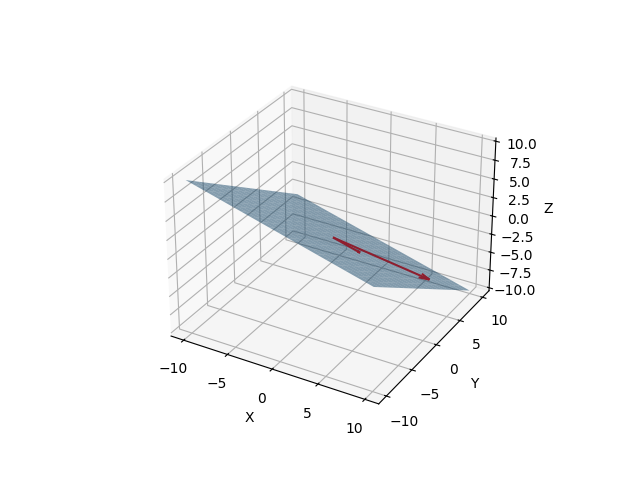

In [10]:
# Anwser exersice 3.1 for case 1:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
case1 = np.array([[3, 0, -1], 
                  [8, 5, -6]])
plane_plot(case1, ax)
plt.show()

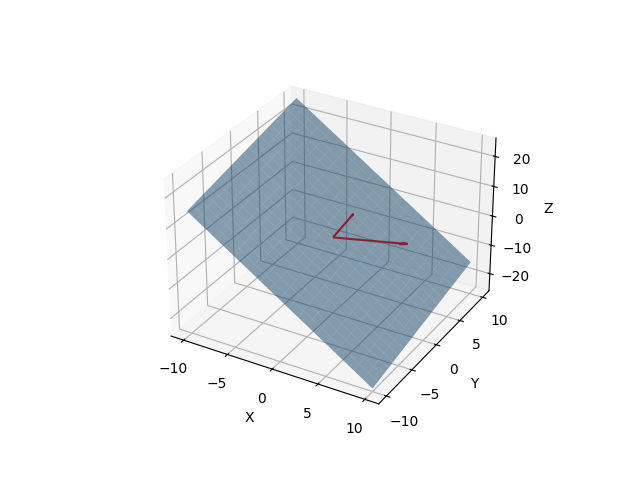

In [11]:
# Anwser exersice 3.1 for case 2:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
case2 = np.array([[0, 4, 2], 
                  [5, 6, -7]])
plane_plot(case2, ax)
plt.show()

3.2. Write a function that performs Gram-Schmidt orthoganization; this function should receive a matrix as its argument and return the orthogonal basis in the form of another matrix

In [25]:
# Anwser exersice 3.2:
def gram_schmidt(A):
    result = np.zeros_like(A, dtype=float)  # creating an empyt array with the same shape as A to store the results in
    for i in range(A.shape[1]):     # for loop over the columns in the matrix A
        v = A[:, i]     # select the current column
        for j in range(i):      # if i = 0, we continue untill the next pass. if i = 1, we execute the for loop once and so forth.
            v = v - np.dot(result[:, j], A[:, i]) * result[:, j]    # we enter here first on the second pass. We then perform the calculation to make v orthogonal
        norm_v = np.linalg.norm(v)  #making v unit length, thus orthonormal
        if norm_v == 0:
            result[:, i] = v
        else:
            result[:, i] = v / norm_v   #putting the orthonormalized vector in the result array. 
    return result

arr = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])
test = gram_schmidt(arr)
print(test)

0
1
 range i = range(0, 1)
2
 range i = range(0, 2)
 range i = range(0, 2)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



3.3. Perform your function on case 1 and case 2

In [13]:
# Anwser exersice 3.3:
# For case 1
gs1 = gram_schmidt(case1)
print(f"Result for case 1: \n {gs1} \n")
# For case 2
gs2 = gram_schmidt(case2)
print(f"Result for case 2: \n {gs2} \n")

Result for case 1: 
 [[ 0.35112344 -0.93632918  0.99875234]
 [ 0.93632918  0.35112344 -0.04993762]] 

Result for case 2: 
 [[0. 1. 0.]
 [1. 0. 0.]] 



3.4. Plot the resulting orthogonal vectors for case 1 and check if they reside on the same plane as you graphed in 3.1. (hint: they should be on the same plane and must be orthogonal; otherwise, it is not done correctly)

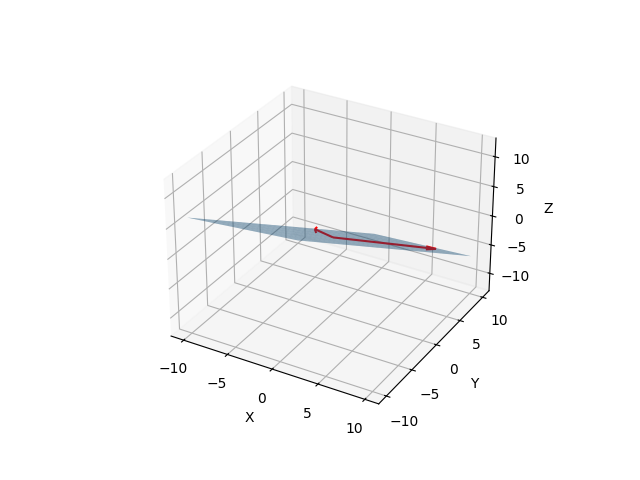

In [14]:
# Anwser exersice 3.4:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plane_plot(gs1*10, ax)
plt.show()


3.5. calculate the orthogonal basis for the aformentioned cases using np.linalg.qr(X) and compare with the result with your version

In [15]:
# Anwser exersice 3.5:
temp1 = np.linalg.qr(case1)
orth_basis_case1 = temp1[1]
print(f" Orthogonal basis for case 1 with numpy:\n {orth_basis_case1} \n With our gram-schmidt function:\n {gs1}\n")

temp2 = np.linalg.qr(case2)
orth_basis_case2 = temp2[1]
print(f" Orthogonal basis for case 2 with numpy:\n {orth_basis_case2} \n With our gram-schmidt function:\n {gs2}\n")

print(f"The reason that they ar not the same is because the function numpy.qr only return the orthogonal basis vectors. Our Gram-Shcmidt function returns the orthonormal basis vectors, meaning that they have the unit length of 1.") 

 Orthogonal basis for case 1 with numpy:
 [[-8.54400375 -4.68164589  5.96909851]
 [ 0.          1.75561721 -1.17041147]] 
 With our gram-schmidt function:
 [[ 0.35112344 -0.93632918  0.99875234]
 [ 0.93632918  0.35112344 -0.04993762]]

 Orthogonal basis for case 2 with numpy:
 [[-5. -6.  7.]
 [ 0. -4. -2.]] 
 With our gram-schmidt function:
 [[0. 1. 0.]
 [1. 0. 0.]]

The reason that they ar not the same is because the function numpy.qr only return the orthogonal basis vectors. Our Gram-Shcmidt function returns the orthonormal basis vectors, meaning that they have the unit length of 1.


***
# Tutorial Section
# Eigenvalues and Eigenvectores

In [16]:
import numpy as np
from numpy.linalg import eig

In [17]:
a = np.array([[0, 2], 
              [2, 3]])
w,v=eig(a)
print('Eigenvalue-value:\n', w)
print('Eigenvector-vectors\n', v)

Eigenvalue-value:
 [-1.  4.]
Eigenvector-vectors
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


In [18]:
a = np.array([[2, 2, 4], 
              [1, 3, 5],
              [2, 3, 4]])
w,v=eig(a)
print('Eigenvalue-value:\n', w, '\n')
print('Eigenvector-vectors\n', v)

Eigenvalue-value:
 [ 8.80916362  0.92620912 -0.73537273] 

Eigenvector-vectors
 [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


***

# Exercise 4

Find the eigenvalues and eigenvectors of the following transformations and plot the eigenvectors

In [19]:
# 4.1. Reflection through x axis
matrix_x_reflection = np.array([[1, 0],
                                [0, -1]])
w,v=eig(matrix_x_reflection)
print('Eigenvalue-value:\n', w, '\n')
print('Eigenvector-vectors\n', v)
plotVectors([[1, 0 ],[0, 1]], ["red", "blue"])
plt.show()

Eigenvalue-value:
 [ 1. -1.] 

Eigenvector-vectors
 [[1. 0.]
 [0. 1.]]


TypeError: Axes3D.quiver() missing 2 required positional arguments: 'V' and 'W'

Eigenvalue-value:
 [-1.  1.] 

Eigenvector-vectors
 [[1. 0.]
 [0. 1.]]


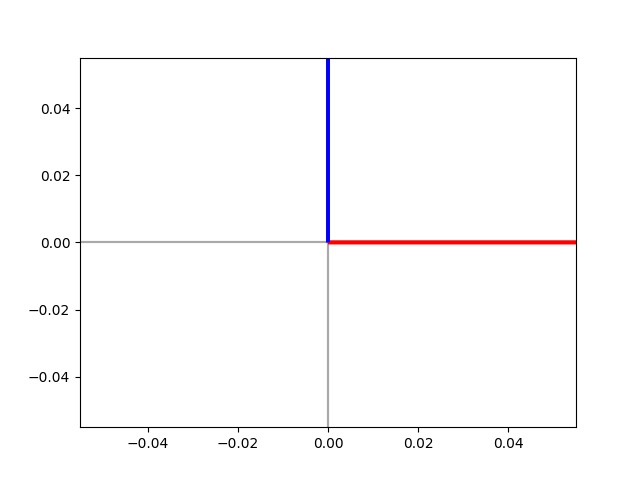

In [ ]:
# 4.2. Reflection through y axis
matrix_y_reflection = np.array([[-1, 0],
                                [0, 1]])
w,v=eig(matrix_y_reflection)
print('Eigenvalue-value:\n', w, '\n')
print('Eigenvector-vectors\n', v)
plotVectors([[1, 0 ],[0, 1]], ["red", "blue"])
plt.show()

Eigenvalue-value:
 [ 1. -1.] 

Eigenvector-vectors
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


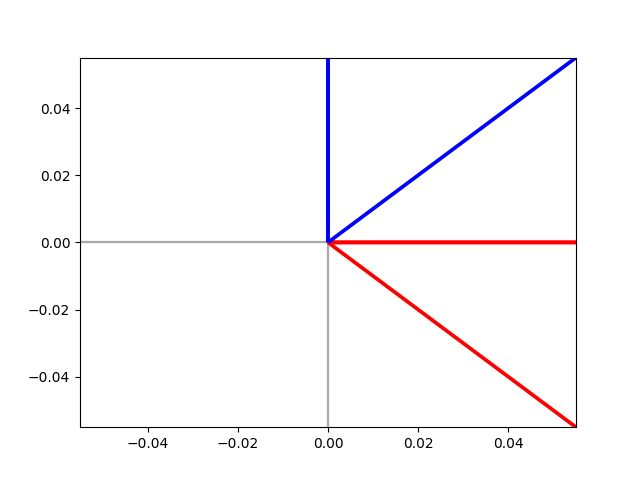

In [ ]:
# 4.3. Relection through y = x line
matrix_swap_coordinates = np.array([[0, 1], 
                                    [1, 0]])
w,v=eig(matrix_swap_coordinates)
print('Eigenvalue-value:\n', w, '\n')
print('Eigenvector-vectors\n', v)
plotVectors([[ 0.70710678,-0.70710678],
       [0.70710678, 0.70710678]], ["red", "blue"])
plt.show()

In [ ]:
# 4.4. Rotation with 20 degrees
import math

angle = 20 
angle=math.radians(angle)                          
cosine=math.cos(angle)
sine=math.sin(angle)
_sine = sine *-1

rotation_matrix = np.array([[cosine, _sine],         
                                [sine, cosine]])

print(f"Rotation matrix: \n {rotation_matrix} \n")

w,v=eig(rotation_matrix)
print('Eigenvalue-value:\n', w, '\n')
print('Eigenvector-vectors\n', v, '\n')

print(f"A transformation matrix can not contain any eigenvectors or eigenvalues since the transformation changes the direction of the original vectors. \nThe eigenspace only contains the zero vector. This is why we get comlpex numbers when we use the function to find the eigenvalues and the eigenvectors.")

Rotation matrix: 
 [[ 0.93969262 -0.34202014]
 [ 0.34202014  0.93969262]] 

Eigenvalue-value:
 [0.93969262+0.34202014j 0.93969262-0.34202014j] 

Eigenvector-vectors
 [[0.        +0.70710678j 0.        -0.70710678j]
 [0.70710678+0.j         0.70710678-0.j        ]] 

A transformation matrix can not contain any eigenvectors or eigenvalues since the transformation changes the direction of the original vectors. 
The eigenspace only contains the zero vector. This is why we get comlpex numbers when we use the function to find the eigenvalues and the eigenvectors.


***

# Tutorial section
# Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA

X = np.array([[1, 0.9, 0.8], 
              [0.9, 1, 0.85], 
              [0.8, 0.85, 1]])

# Initialize PCA
pca = PCA(n_components=2)

# Fit PCA
pca.fit(X)

In [ ]:
# get the eigenvectors
pca.components_

In [ ]:
# get the eigenvalues
pca.explained_variance_

In [ ]:
# Transform the data
X_pca = pca.transform(X)

# Output the transformed data
print("Transformed Matrix:\n", X_pca)

***

In [ ]:
mean = [0, 0]
cov = [[1, 0.9], 
       [0.9, 1]]  # Covariance matrix

# Generate the data
data = np.random.multivariate_normal(mean, cov, 1000)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title('2D Elongated Normal Data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# Exercise 5

Given the above data, calculate the followings:

In [ ]:
# 5.1. Covarience matrix of the data
cov_matr = np.cov(data, rowvar=False)
print(f" Covariance matrix for 'data' is: \n {cov_matr}")

In [ ]:
# 5.2. Eigenvalues and Eigenvectors of the covariane matrix
w, v = eig(cov_matr)
print(f"Eigenvalues for the covariance matrix of 'data':\n {w} \n")
print(f"Eigenvectors for the covariance matrix of 'data':\n {v} \n")

In [ ]:
# 5.3. Plot the components (eigenvectors) on the data
colors = ['red', 'blue']
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plotVectors(v, colors)
plt.title('Data with but with eigenvectors from cov matrix')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()